# 6a. Visualisierung verschiedener Merkmale einer Textsammlung

## Inhalte 
1. Lexical Dispersion Plot (NLTK)
2. Visualisierung von Worthäufigkeiten
3. Visualisierung von Ähnlichkeiten

In [1]:
import pathlib

import nltk
import pandas as pd
import seaborn as sns

# set style of visualizations using seaborn
sns.set_style("whitegrid")

# prepare paths
DATA_DIR = pathlib.Path().cwd().parent.joinpath("data")
PROC_DATA_DIR = DATA_DIR.joinpath("processed")
IMG_DATA_DIR = DATA_DIR.joinpath("images")

# Prepare corpus reader
CORPUS_DIR = DATA_DIR.joinpath("corpus").joinpath("bruder-grimm_1857")
GERMAN_TOKENIZER = nltk.data.load("nltk:tokenizers/punkt/german.pickle")
fairytale_corpus_reader = nltk.corpus.PlaintextCorpusReader(
    root=str(CORPUS_DIR),
    fileids="[\w+-]*\.txt",
    sent_tokenizer=GERMAN_TOKENIZER,
)

In [2]:
# Create nltk.Text object from all tokens in fairytales corpus
tokens = [token.lower() for token in fairytale_corpus_reader.words()]
text = nltk.Text(tokens)

In [3]:
# create a sorted list of keywords to search in the corpus: example animals
animals = sorted(["wolf", "pferd", "esel", "hund", "katze"])
animals

['esel', 'hund', 'katze', 'pferd', 'wolf']

## 1. Lexical Dispersion Plot (NLTK)

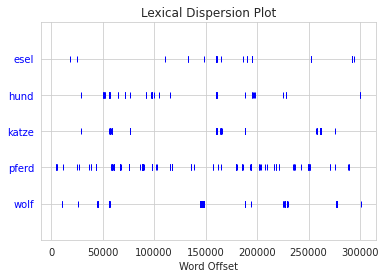

In [4]:
# Create a lexical dispersion plot using nltk
# each occurence of a token in the text will be displayed as a blue bar
text.dispersion_plot(animals)

In [5]:
# load counts table from disk into a pandas.DataFrame
filename = PROC_DATA_DIR.joinpath("fairytales-animals-counts.tsv")
fairytales_animals_counts = pd.read_csv(filename, sep="\t")
fairytales_animals_counts.set_index("title", inplace=True)
fairytales_animals_counts.head()

,esel,hund,katze,pferd,wolf
title,,,,,
allerleirauh.txt,0,0,0,0,0
armuth-und-demuth-fuhren-zum-himmel.txt,0,0,0,0,0
aschenbuttel.txt,0,0,0,5,0
bruder-lustig.txt,0,0,0,0,0
bruderchen-und-schwesterchen.txt,0,0,0,1,3


## 2. Visualisierung von Worthäufigkeiten

### 2.1 Vertical Bar Plot (pandas)
- vgl. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html

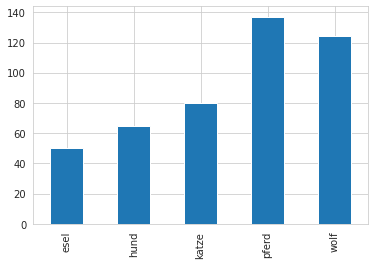

In [6]:
# Plot the sum of each animals counts over all fairytale texts in a bar chart using pandas
barplot = fairytales_animals_counts.sum().plot(kind="bar");

In [7]:
# store the barplot on disk
filename = IMG_DATA_DIR.joinpath("fairytales-animals-counts-barplot.png")
barplot.figure.savefig(filename, bbox_inches="tight", dpi=300)

In [8]:
# Show the 10 highest counts in fairytales for a particular animal
query = "wolf"
fairytales_animals_counts[query].sort_values(ascending=False).head(10)

title
die-zwei-bruder.txt                            18
rothkappchen.txt                               17
der-wolf-und-die-sieben-jungen-geislein.txt    17
der-wolf-und-der-fuchs.txt                     17
der-wolf-und-der-mensch.txt                    11
der-alte-sultan.txt                            10
der-wunderliche-spielmann.txt                   9
daumesdick.txt                                  8
der-zaunkonig-und-der-bar.txt                   6
die-hochzeit-der-frau-fuchsin.txt               5
Name: wolf, dtype: int64

In [9]:
# Use pandas to display the counts per animal using a background gradient
fairytales_animals_counts.head(25).style.background_gradient()

,esel,hund,katze,pferd,wolf
title,,,,,
allerleirauh.txt,0,0,0,0,0
armuth-und-demuth-fuhren-zum-himmel.txt,0,0,0,0,0
aschenbuttel.txt,0,0,0,5,0
bruder-lustig.txt,0,0,0,0,0
bruderchen-und-schwesterchen.txt,0,0,0,1,3
das-alte-mutterchen.txt,0,0,0,0,0
das-blaue-licht.txt,0,0,0,0,0
das-burle-im-himmel.txt,0,0,0,0,0
das-burle.txt,0,0,0,0,0


### 2.2 Heatmap (seaborn)
- vgl. https://seaborn.pydata.org/generated/seaborn.heatmap.html

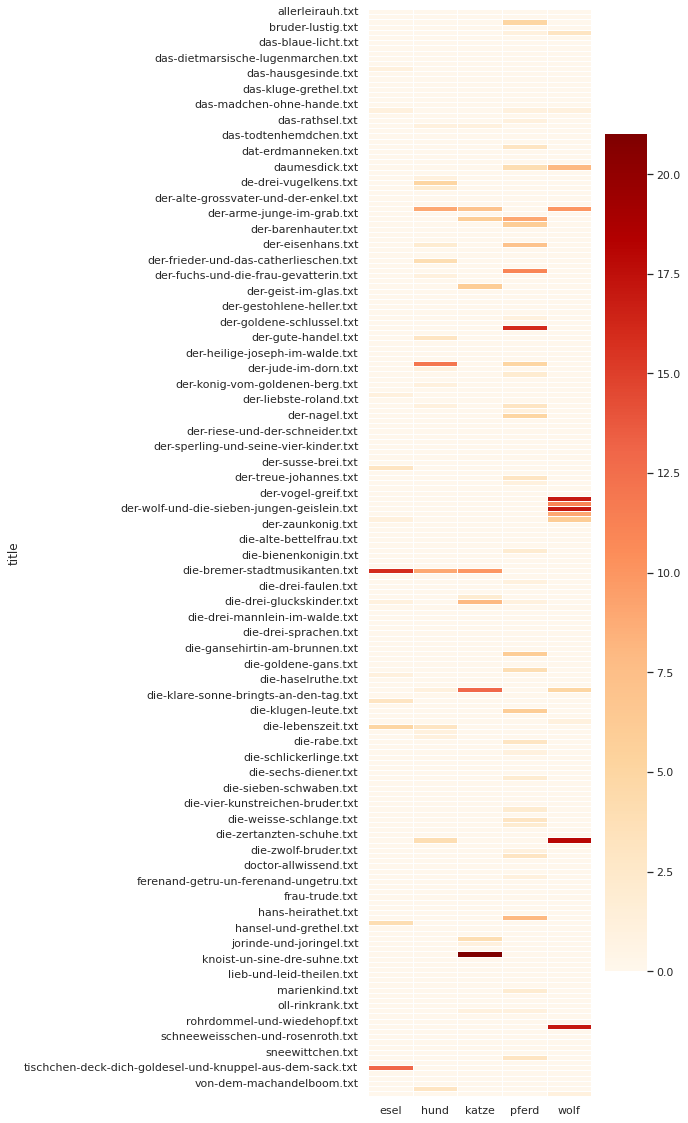

In [10]:
# Use seaborn to display the counts as a heatmap visualization
sns.set(rc={"figure.figsize": (5, 20)})
heatmap = sns.heatmap(fairytales_animals_counts, cmap="OrRd", linewidth=1)

In [11]:
# store the heatmap on disk
filename = IMG_DATA_DIR.joinpath("fairytales-animals-heatmap.png")
heatmap.figure.savefig(filename, bbox_inches="tight", dpi=300)

In [12]:
# find rows in table, that contain at least one animal's count with 1 -> sum of row is greater than 0
rows_with_animal_counts = fairytales_animals_counts.sum(axis=1) != 0
# select only these "positive count" rows from table
positive_fairytales_animals_counts = fairytales_animals_counts[rows_with_animal_counts]
positive_fairytales_animals_counts.head()

,esel,hund,katze,pferd,wolf
title,,,,,
aschenbuttel.txt,0,0,0,5,0
bruderchen-und-schwesterchen.txt,0,0,0,1,3
das-eselein.txt,1,0,0,0,0
das-marchen-vom-schlauraffenland.txt,1,0,0,1,1
das-rathsel.txt,0,0,0,1,0


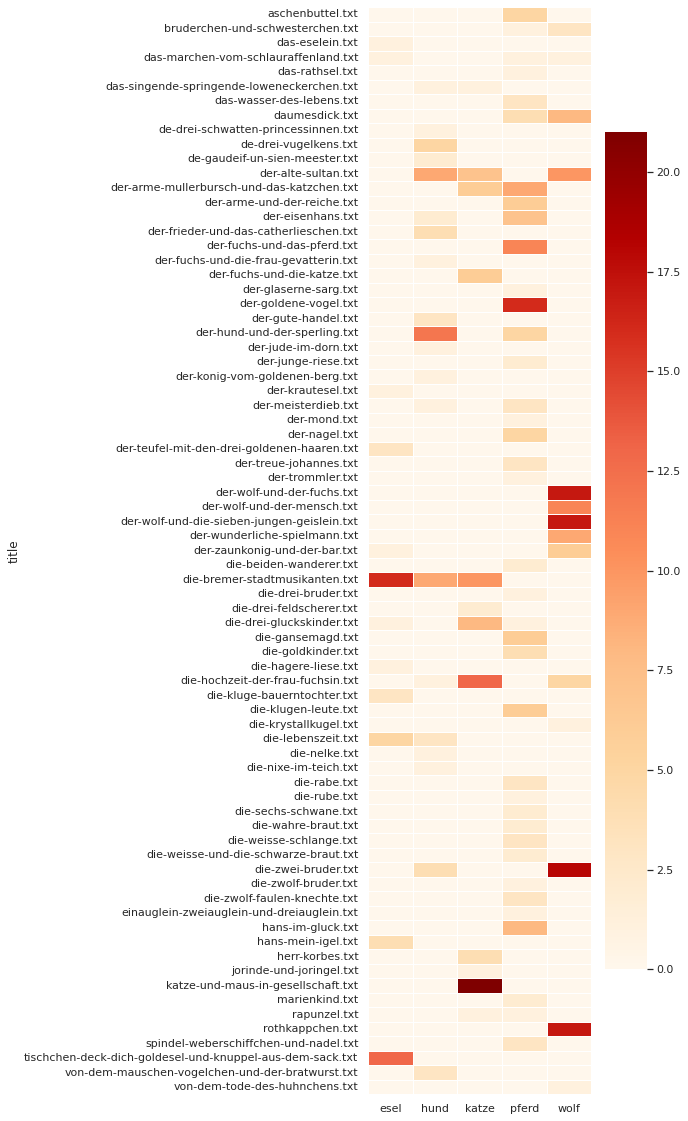

In [13]:
# Use seaborn to display the positive counts as a heatmap visualization
sns.set(rc={"figure.figsize": (5, 20)})
heatmap = sns.heatmap(positive_fairytales_animals_counts, cmap="OrRd", linewidth=1)

In [14]:
# store the heatmap on disk
filename = IMG_DATA_DIR.joinpath("fairytales-animals-heatmap-positive-counts.png")
heatmap.figure.savefig(filename, bbox_inches="tight", dpi=300)

## 3. Visualisierung von Ähnlichkeiten
- Heatmap Korrelationen (pandas and seaborn)
- see: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
- https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [15]:
# Calculate the correlations between the animal counts per fairytale using pandas
# see: https://en.wikipedia.org/wiki/Pearson_correlation_coefficient
# correlation coefficients range from 1 to -1
# a value of 1 (esel and esel) means perfect correlation
positive_fairytales_animals_counts.corr()

,esel,hund,katze,pferd,wolf
esel,1.000000,0.289042,0.185952,-0.165926,-0.093799
hund,0.289042,1.000000,0.180744,-0.088458,0.084219
katze,0.185952,0.180744,1.000000,-0.114351,0.002509
pferd,-0.165926,-0.088458,-0.114351,1.000000,-0.200311
wolf,-0.093799,0.084219,0.002509,-0.200311,1.000000


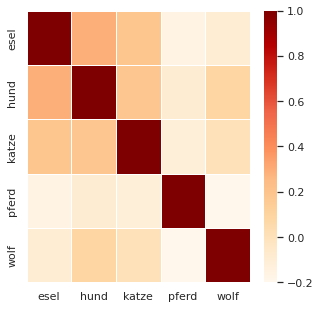

In [16]:
# Use seaborn to display the correlation coefficients as a heatmap visualization
sns.set(rc={"figure.figsize": (5, 5)})
heatmap = sns.heatmap(positive_fairytales_animals_counts.corr(), cmap="OrRd", linewidth=1);

In [17]:
# store the heatmap on disk
filename = IMG_DATA_DIR.joinpath("animals-correlations-heatmap-positive-counts.png")
heatmap.figure.savefig(filename, bbox_inches="tight", dpi=300)

In [18]:
# The matrix can be transposed using the method .T
# this way we can calculate the correlations between the fairytales regarding the animal counts
positive_fairytales_animals_counts.head().T.corr()

title,aschenbuttel.txt,bruderchen-und-schwesterchen.txt,das-eselein.txt,das-marchen-vom-schlauraffenland.txt,das-rathsel.txt
title,,,,,
aschenbuttel.txt,1.000000,0.085749,-0.250000,0.408248,1.000000
bruderchen-und-schwesterchen.txt,0.085749,1.000000,-0.342997,0.560112,0.085749
das-eselein.txt,-0.250000,-0.342997,1.000000,0.408248,-0.250000
das-marchen-vom-schlauraffenland.txt,0.408248,0.560112,0.408248,1.000000,0.408248
das-rathsel.txt,1.000000,0.085749,-0.250000,0.408248,1.000000


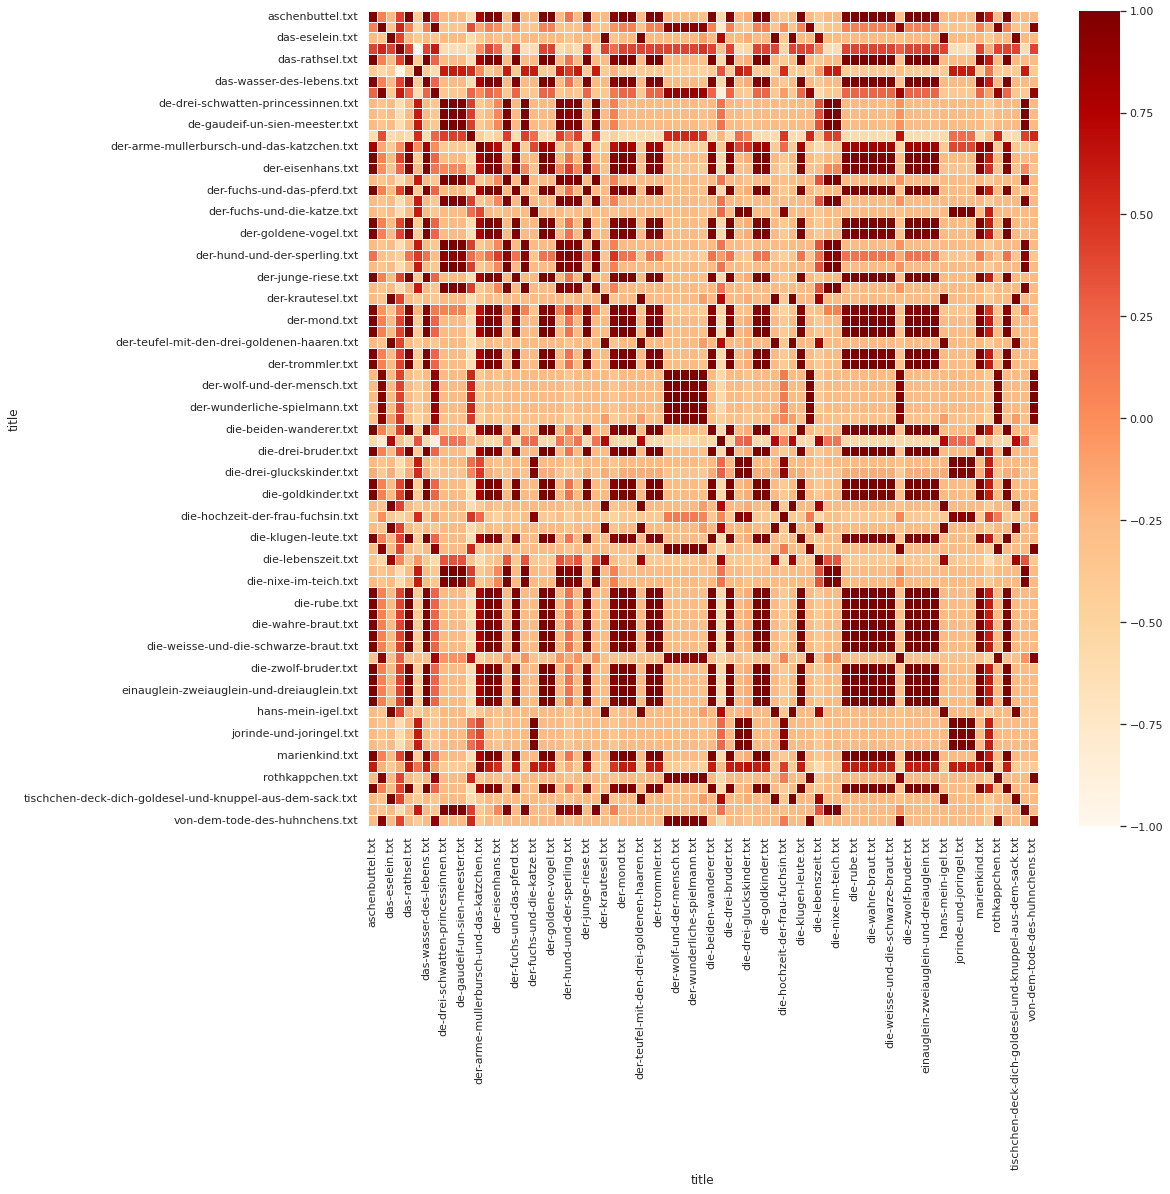

In [19]:
# Use seaborn to display the correlation coefficients as a heatmap visualization
sns.set(rc={"figure.figsize": (15, 15)})
heatmap = sns.heatmap(positive_fairytales_animals_counts.T.corr(), cmap="OrRd", linewidth=1);

In [20]:
# store the heatmap on disk
filename = IMG_DATA_DIR.joinpath("fairytales-correlations-animals-heatmap-positive-counts.png")
heatmap.figure.savefig(filename, bbox_inches="tight", dpi=300)

In [21]:
import session_info

session_info.show()